In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from GradientBoosting import GradientBoosting

import time, timeit

In [2]:
seed = 18

In [3]:
feature_names = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"
]

In [4]:
data = pd.read_csv('./data/abalone.data', header=None, names=feature_names)

In [5]:
sex_mapping = {'M': 0, 'F': 1, 'I': 2}

data['Sex'] = data['Sex'].map(sex_mapping)

In [6]:
data.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2232,1,0.560,0.445,0.180,0.9030,0.3575,0.2045,0.2950,9
1820,1,0.705,0.545,0.180,1.5395,0.6075,0.3675,0.4645,13
2785,0,0.600,0.510,0.185,1.2850,0.6095,0.2745,0.3150,9
3134,0,0.460,0.360,0.125,0.5470,0.2165,0.1105,0.1900,8
1745,1,0.690,0.550,0.200,1.5690,0.6870,0.3675,0.4600,12


Разделим данные в пропорции 8:2

In [7]:
X = data.drop(['Rings'], axis=1)
y = data.Rings

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [9]:
X_train.shape

(3341, 8)

In [143]:
n_estimators = 100
criterion = 'friedman_mse'
max_depth = 3
lr = 0.1

## Своя реализация

In [144]:
gb_custom = GradientBoosting(learning_rate=lr,
                             n_estimators=n_estimators,
                             criterion=criterion,
                             max_depth=max_depth,
                             random_state=seed)

In [145]:
%timeit
gb_custom.fit(x=X_train, y=y_train)

In [146]:
train_preds = gb_custom.predict(x=X_train)

y_preds = gb_custom.predict(x=X_test)
# y_preds_rounded = y_preds.round()

In [147]:
round(mean_squared_error(y_true=y_train, y_pred=train_preds),4)

3.4898

In [148]:
round(r2_score(y_true=y_train, y_pred=train_preds),4)

0.6592

In [149]:
round(mean_squared_error(y_true=y_test, y_pred=y_preds),4)

4.9561

In [150]:
round(r2_score(y_true=y_test, y_pred=y_preds),4)

0.5489

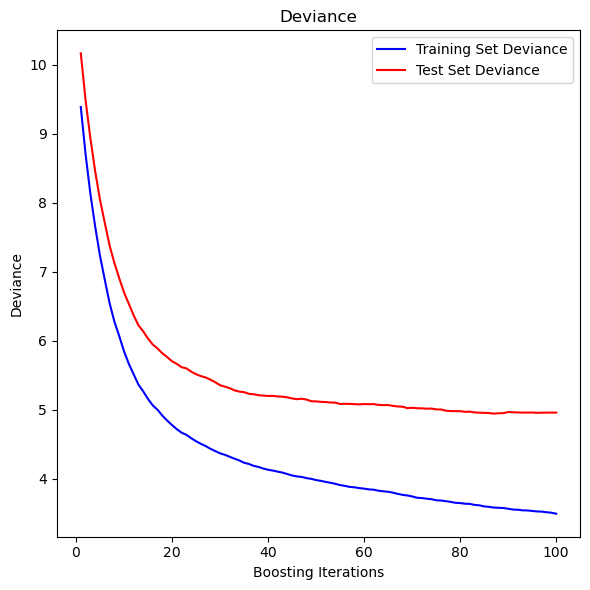

In [151]:
train_score = np.zeros(n_estimators, dtype=np.float64)
test_score = np.zeros(n_estimators, dtype=np.float64)

for i, y_pred in enumerate(gb_custom.train_predictions_):
    train_score[i] = mean_squared_error(y_true=y_train, y_pred=y_pred)

for i, y_pred in enumerate(gb_custom.test_predictions_):
    test_score[i] = mean_squared_error(y_true=y_test, y_pred=y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")

plt.plot(
    np.arange(n_estimators) + 1,
    train_score,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(n_estimators) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Библиотечная реализация

In [152]:
gb_sklearn = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=lr,
    n_estimators=n_estimators,
    # если меньше 1, то SGB
    subsample=1.0,
    max_depth=max_depth,
    criterion=criterion,
    random_state=seed
)

In [153]:
%timeit
gb_sklearn.fit(X=X_train, y=y_train)

GradientBoostingRegressor(random_state=18)

In [154]:
y_preds = gb_sklearn.predict(X=X_test)
# y_preds_rounded = y_preds.round()

train_preds = gb_sklearn.predict(X=X_train)

In [155]:
y_preds

array([13.62783153,  7.7762526 ,  8.88616441, 17.86577964, 11.93931113,
        4.45914126,  8.82515063,  6.81965068,  7.0713753 , 10.80920092,
       11.32847249, 12.62295623,  7.14651847, 10.71465871, 12.4432414 ,
        8.97292278, 10.62446357,  9.07674753, 12.07136911, 13.66618041,
       10.01830074,  8.68185406,  9.92027174, 11.1682243 , 10.17930767,
       10.71499677,  6.40813733,  8.21676208,  4.43058938, 10.8150394 ,
       11.88182937,  6.81965068,  7.72167428, 13.38951321,  8.76439335,
       17.34434103, 11.8662952 , 10.27736629, 10.59884728,  9.6233944 ,
       11.72057651, 12.69137396, 12.26715763, 10.4302691 ,  9.00903426,
        9.39866367,  9.69366436,  7.05436084,  7.8695002 ,  7.57964901,
       10.15384246, 11.30630469, 17.2722353 , 11.27870702,  8.88218292,
       13.03559881,  9.74176519,  8.5247217 , 10.04020303, 10.18768215,
       10.46992556, 11.57663929, 10.17865579,  9.30746605,  8.91508783,
       12.36473142, 10.06884725,  8.45122446,  9.37333954, 12.94

In [156]:
round(mean_squared_error(y_true=y_train, y_pred=train_preds),4)

3.4898

In [157]:
round(r2_score(y_true=y_train, y_pred=train_preds),4)

0.6592

In [158]:
round(mean_squared_error(y_true=y_test, y_pred=y_preds),4)

4.9261

In [159]:
round(r2_score(y_true=y_test, y_pred=y_preds),4)

0.5516

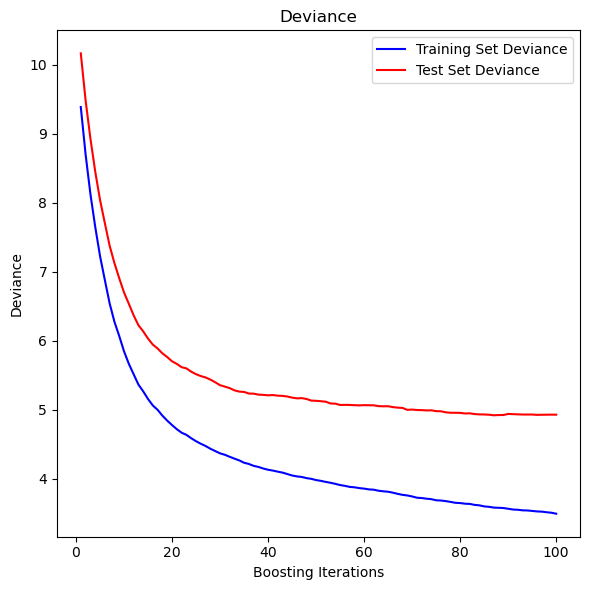

In [160]:
test_score = np.zeros(n_estimators, dtype=np.float64)

for i, y_pred in enumerate(gb_sklearn.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_true=y_test, y_pred=y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")

plt.plot(
    np.arange(n_estimators) + 1,
    gb_sklearn.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(n_estimators) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()